# **Project description**

*   The Playstore apps data has enormous potential to drive app-making businesses to success.
* Actionable insights can be drawn for developers to work on and capture the Android market.  
*   Each app(row) has values for category,ratings,size and more.Another dataset contains customer reviews of android apps.
*   Explore and analyze the data to discover key factors responsible for app engagement and success.


**1.**   **Play store data (main dataset)**:
  **This contains data on the Google Play applications. It has 10,841 rows of data which has following columns.**

**App Category**: Category of the app. This could be beauty, business, medical,art and design entertainment, education,family...etc.

**Rating**: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews**: number of user reviews each app has received.

**Size**: The memory size needed to install the application.

**Installs**: The number of times each application has been installed by users.

**Type**: Whether the app is free or a paid app.

**Price**: The price of the app.

**Content** Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

**Genres**: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

**Last Updated**: Release date of the most recent update for the app.

**Current Ver**: The app's current version.

**Android Ver**: The oldest version of Android OS supported by the app.


---



**2.** **Sentiment Analysis**:
**This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:**

**App** : Name of the app.

**Translated_Review**: Either the original review in English, or a translated version if the orignal review is in another language.

**Sentiment**: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

**Sentiment_Polarity**: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

**Sentiment_Subjectivity**: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.



In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path for csv file and read the file
playstore_df1=pd.read_csv('/content/Play Store Data.csv')
user_df2=pd.read_csv('/content/User Reviews.csv')

In [ ]:
#taking an overview of the data 
playstore_df1.head()
#it shows 5 rows and all columns of the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#checking the no. of rows and columns
playstore_df1.shape

(10841, 13)

**There are 10841 rows and 13 columns in the dataset.**

# **Data cleaning of playstore dataset.**

In [ ]:
#checking the datatypes present 
playstore_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#creating copy of our dataset
new_df1=playstore_df1.copy()

In [ ]:
#checking if null values are present 
new_df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**There are 1474 null values present in the Rating column.**

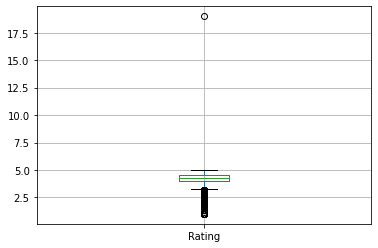

In [ ]:
new_df1.boxplot('Rating')

**From the above boxplot we can see there is an outlier present in Rating Column.**

In [ ]:
#finding the outlier present in the Rating column because rating should not be greater than 5.0
new_df1[new_df1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#dropping the row with the outlier
new_df1.drop([10472],inplace=True)

In [ ]:
#filling all null values in 'Rating' column with median.
new_df1['Rating'].fillna(new_df1['Rating'].mean(),axis=0,inplace=True)

In [ ]:
new_df1['Rating'].isnull().sum()

0

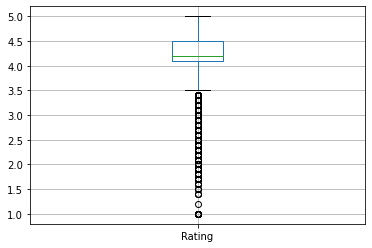

In [ ]:
new_df1.boxplot()

In [ ]:
#convert 'Reviews' column datatype from object to float
new_df1['Reviews']=pd.to_numeric(new_df1['Reviews']).convert_dtypes()

In [ ]:
#Replacing the '+' and ',' present 'price' column.
new_df1['Price']=new_df1['Price'].str.replace('$','').replace('Everyone','0.0').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#checking null values in the 'Size' column
new_df1['Size'].isnull().sum()

0

In [ ]:
# removing '+' and ',' prersent in Installs column
new_df1['Installs']= new_df1['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
new_df1['Installs']= new_df1['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [ ]:
# converted Installs coulmn data type from string to integer
new_df1['Installs'] = new_df1['Installs'].astype('int')

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  Int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 1.2+ MB


# **Dropping unwanted columns from the Dataset**

In [ ]:
new_df1.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  Int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(6)
memory usage: 942.1+ KB


In [ ]:
new_df1.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.478907,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# **Data Visualization**

In [ ]:
#Total no. of Apps present in the Dataset in different categories
new_df1['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
df=pd.DataFrame(new_df1,columns=['Category','Rating'])
df

,Category,Rating
0,ART_AND_DESIGN,4.100000
1,ART_AND_DESIGN,3.900000
2,ART_AND_DESIGN,4.700000
3,ART_AND_DESIGN,4.500000
4,ART_AND_DESIGN,4.300000
...,...,...
10836,FAMILY,4.500000
10837,FAMILY,5.000000
10838,MEDICAL,4.191757
10839,BOOKS_AND_REFERENCE,4.500000


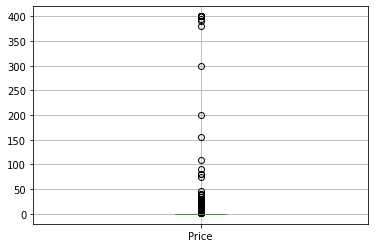

In [ ]:
new_df1.boxplot('Price')

**From the above plot we can see there are only few apps whose price is above $50**

**Hence,we will drop them as considered outlier while data visualization.**

In [ ]:
df = new_df1.copy()

In [ ]:
df.drop(df[df['Price']>=50].index,inplace=True)

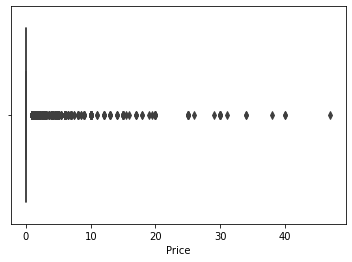

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
#finding the correlation 
new_df1.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068018,0.051221,-0.020190
Reviews,0.068018,1.000000,0.643122,-0.009667
Installs,0.051221,0.643122,1.000000,-0.011689
Price,-0.020190,-0.009667,-0.011689,1.000000


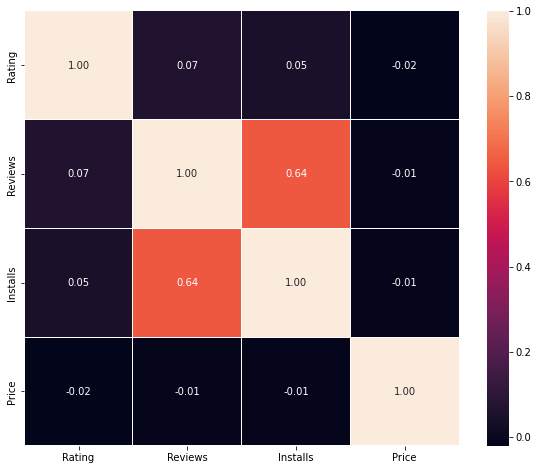

In [ ]:
#Heatmap for checking the correlation between the columns of dataset
fig, axes =plt.subplots(figsize=(10,8))
sns.heatmap(new_df1.corr(),ax=axes,annot=True,linewidths=0.1,fmt='.2f',square=True)
plt.show()

**From the above plot we can see that the 'Reviews' and 'Installs' columns has most correlation.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


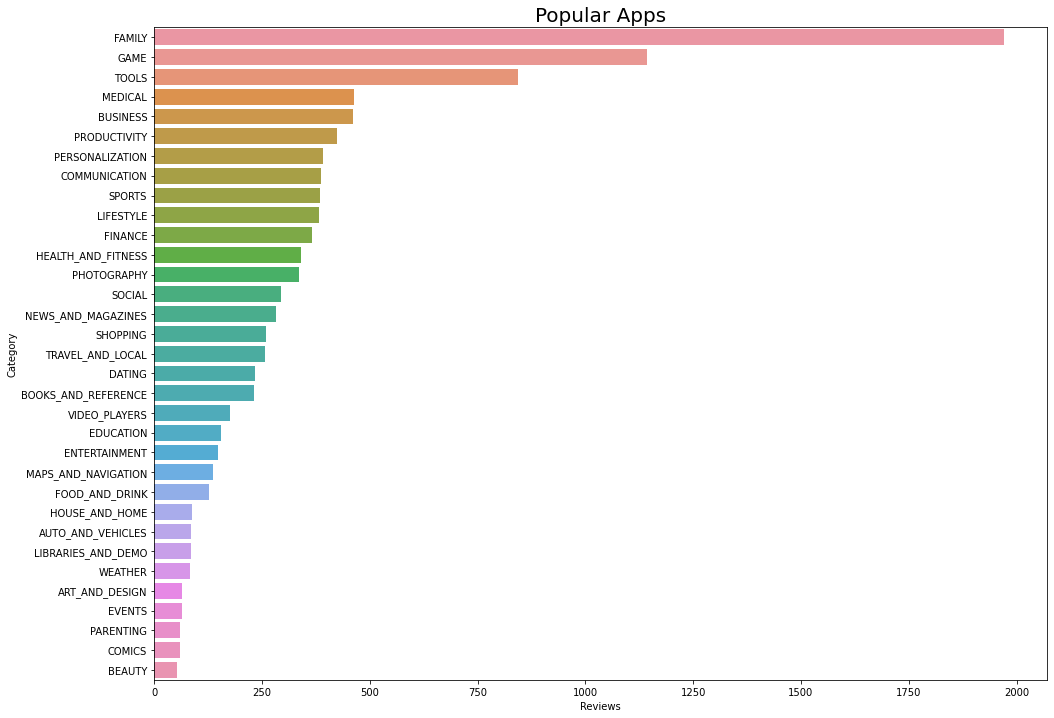

In [ ]:
#plotting barplot for visualizing apps reviews w.r.t Category
apps_category = new_df1.Category.value_counts();
plt.figure(figsize=(16, 12));
sns.barplot(apps_category, apps_category.index);
plt.ylabel('Category');
plt.xlabel('Reviews');
plt.title('Popular Apps', Size = 20);
plt.show();

**From above barplot we can see that there are total 33 different categories in the dataset. The most popular apps are from 'Family' and 'Games' category. The least reviews are for the apps from 'Beauty' and 'Comics' Category.**

In [ ]:
Category = new_df1['Content Rating'].value_counts().index
Values = new_df1['Content Rating'].value_counts()

Category_list = []
Values_list = []
for i in range(len(Category)):
    Category_list.append(Category[i])
    Values_list.append(Values[i])

In [ ]:
print(Category_list)

['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+', 'Unrated']


In [ ]:
print(Values_list)

[8714, 1208, 499, 414, 3, 2]


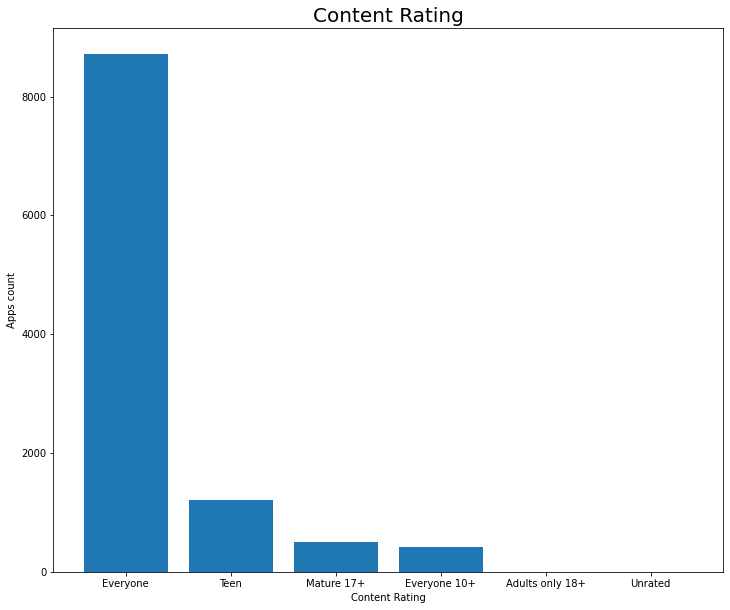

In [ ]:
# Plotting the bar graph to visualize Content Rating.
plt.figure(figsize=(12,10))
plt.bar(Category_list,Values_list,width=0.8, alpha= 1);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps count');
plt.xlabel('Content Rating');

**From the above plot we can see that most of the content ratings are from 'Everyone' Category.**

In [ ]:
# Creating Dataframe for category wise app installs.
highest_installs_df =new_df1.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [ ]:
highest_installs_df.head()

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


In [ ]:
number_of_installs = []
app_category = []

for i in range(len(highest_installs_df)):
    number_of_installs.append(highest_installs_df.Installs[i])
    app_category.append(highest_installs_df.index[i])

In [ ]:
print(number_of_installs)
noi=pd.DataFrame(number_of_installs)

[35086024415, 32647276251, 14176091369, 14069867902, 11452771915, 10258263505, 10088247655, 7496317760, 6868887146, 6222002720, 3247848785, 2869160000, 2325494782, 1921469576, 1751174498, 1583072512, 1001914865, 876648734, 871452000, 724281890, 537643539, 426100520, 273898751, 264310807, 168712461, 124338100, 62995910, 56086150, 53257437, 53130211, 31521110, 27197050, 15973161]


In [ ]:
app_category

['GAME',
 'COMMUNICATION',
 'PRODUCTIVITY',
 'SOCIAL',
 'TOOLS',
 'FAMILY',
 'PHOTOGRAPHY',
 'NEWS_AND_MAGAZINES',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'SHOPPING',
 'ENTERTAINMENT',
 'PERSONALIZATION',
 'BOOKS_AND_REFERENCE',
 'SPORTS',
 'HEALTH_AND_FITNESS',
 'BUSINESS',
 'FINANCE',
 'EDUCATION',
 'MAPS_AND_NAVIGATION',
 'LIFESTYLE',
 'WEATHER',
 'FOOD_AND_DRINK',
 'DATING',
 'HOUSE_AND_HOME',
 'ART_AND_DESIGN',
 'LIBRARIES_AND_DEMO',
 'COMICS',
 'MEDICAL',
 'AUTO_AND_VEHICLES',
 'PARENTING',
 'BEAUTY',
 'EVENTS']

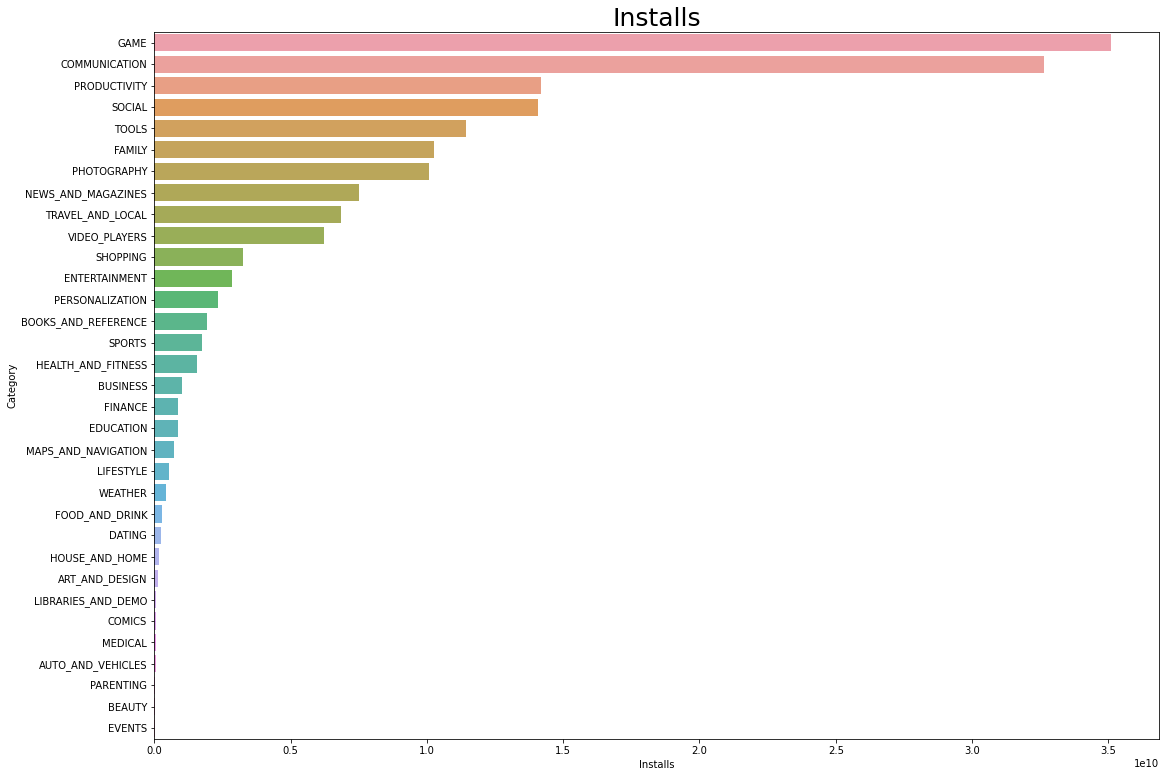

In [ ]:
# Plotting barplots for visualize apps category w.r.t. number of installs.
plt.figure(figsize=(18,13))
plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = number_of_installs, y = app_category, alpha =0.9)
graph.set_title("Installs", fontsize = 25);

**From the above plot we can see that most of the apps has been installed from 'Game' and 'Communication' category.**

**Let's see which apps are most installed Category wise.**

In [ ]:
# created function for getting top apps w.r.t category
def top_apps_in_category(str):
    top = new_df1[new_df1['Category'] == str]
    top_apps = top.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(12,8))
    plt.title('Top Installed Apps',size = 20)    
    graph = sns.barplot(x = top_apps.App, y = top_apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

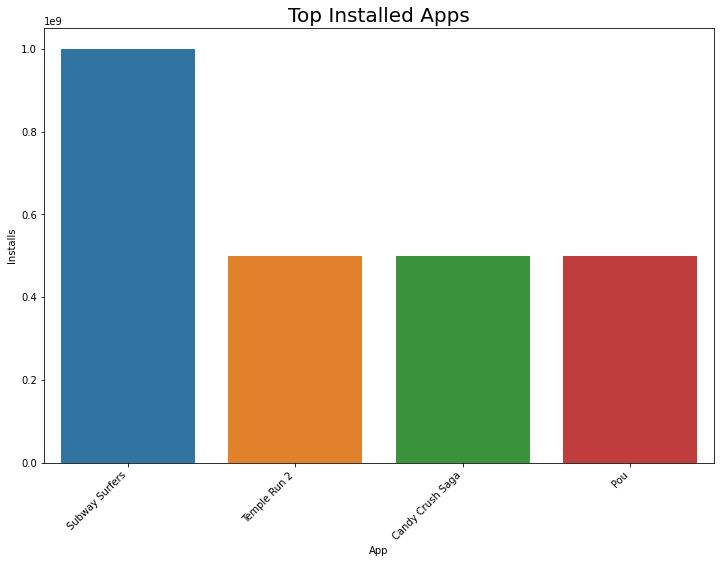

In [ ]:
# Top apps for game Category
top_apps_in_category('GAME')

**From the above plot we can see that the most installed games from the 'Game' Category are 'Subway Suffers', 'Temple Run 2', 'Candy Crush Saga' and 'Pou'.**

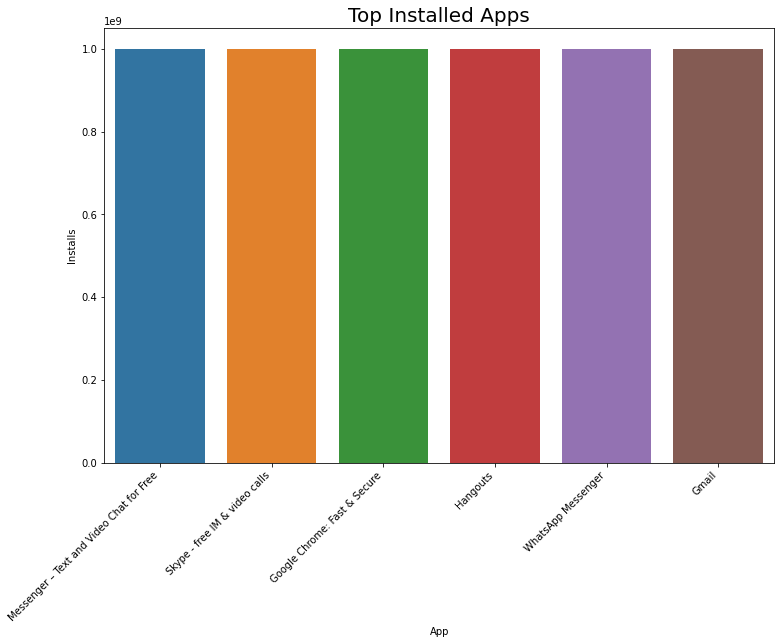

In [ ]:
# Top apps for Communication Category
top_apps_in_category('COMMUNICATION')

**From the above plot we can see that the most installed apps in 'Communication' Category are 'Messenger', 'Skype','Google Chrome','Hangouts','WhatsApp Messenger' and 'Gmail'.**

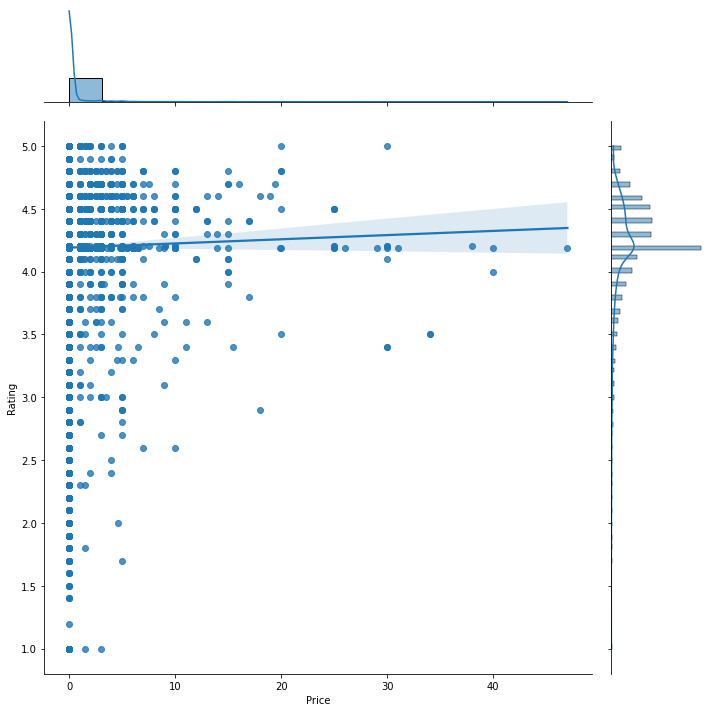

In [ ]:
# Making a jointplot to understand the effect of price on rating
sns.jointplot(x='Price' , y='Rating', data=df, kind='reg', height=10);

**APPS WITH PRICE $0 HAS MORE NUMBER OF RATINGS.**

**AS THE PRICE INCREASE NO. OF RATINGS DECREASE.**

# **PLOT TO VISUALIZE NO OF APPS PAID AND FREE.**

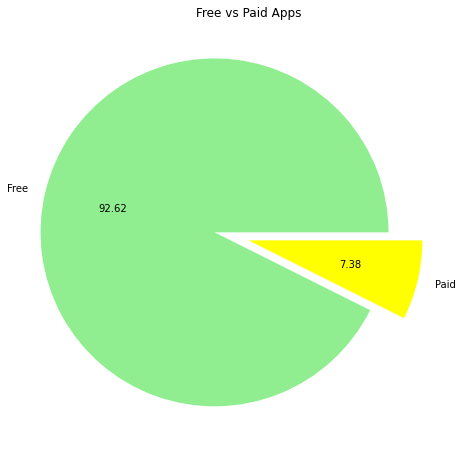

In [ ]:
# percentage of free vs paid apps aviilable on playstore
plt.subplots(figsize=(12,8))
Free_vs_paid = new_df1.groupby('Type').size()
colors = ["lightgreen","yellow"]
explode = (0.2,0)
plt.pie(Free_vs_paid, explode=explode, colors=colors,labels=['Free','Paid'],autopct='%.2f')
plt.title('Free vs Paid Apps')
plt.show()

**From above piechart we can see that 92% apps are free while 8% are paid apps on playstore.**

# **SENTIMENT ANALYSIS**
**This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:**

* App : Name of the app.

* Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

* Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

* Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

* Sentiment_subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.




In [ ]:
#loading the data of user reviews
df2=pd.read_csv('/content/User Reviews.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# Dropped null values present in the user_reviews data frame
df2.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'], inplace=True)

In [ ]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# Merge reviews dataset with apps
merge_df = pd.merge(df2,new_df1,on='App',how='inner')

In [ ]:
merge_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness


In [ ]:
merge_df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

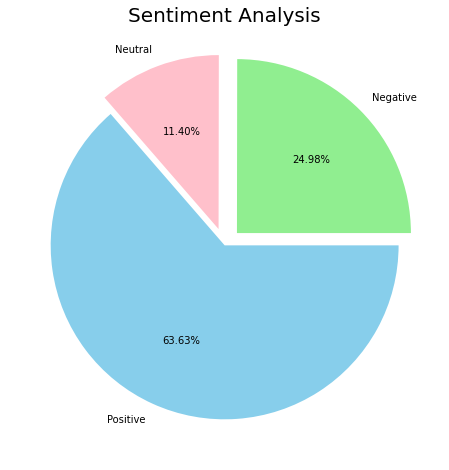

In [ ]:
plt.subplots(figsize=(12,8))
Sentiments = merge_df.groupby('Sentiment').size()
colors = ["lightgreen","pink","skyblue"]
explode = (0.1,0.1,0)
plt.pie(Sentiments, explode=explode, colors=colors, labels=['Negative','Neutral','Positive'],autopct='%.2f%%')
plt.title('Sentiment Analysis', size = 20)
plt.show()

**It can be seen from above chart that positive reviews are more than negative reviews.**

In [ ]:
category_sentiment = merge_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
category_sentiment

,Category,Sentiment,Sentiment Count,log_sentiment_count
0,ART_AND_DESIGN,Negative,61,5.930737
1,ART_AND_DESIGN,Neutral,62,5.954196
2,ART_AND_DESIGN,Positive,259,8.016808
3,AUTO_AND_VEHICLES,Negative,17,4.087463
4,AUTO_AND_VEHICLES,Neutral,36,5.169925
...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,58,5.857981
95,VIDEO_PLAYERS,Positive,190,7.569856
96,WEATHER,Negative,33,5.044394
97,WEATHER,Neutral,35,5.129283


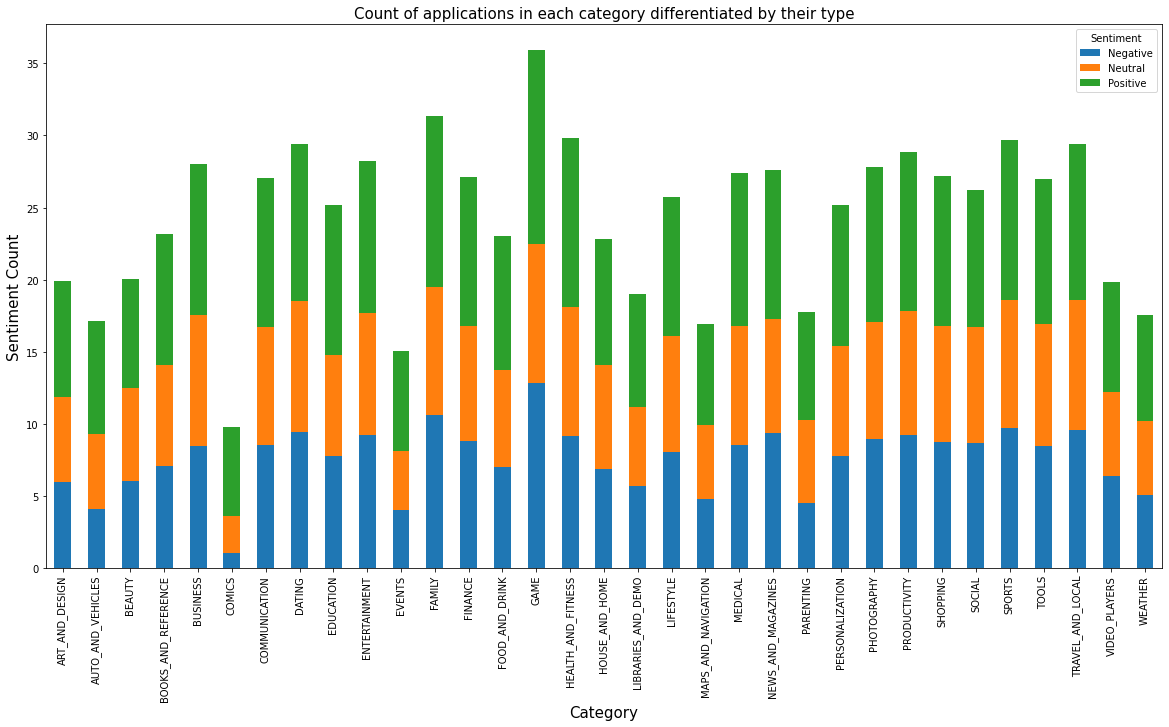

In [ ]:
# Sentiment Count of applications in each category differentiated by their type
df_sentiment = category_sentiment.pivot('Category','Sentiment','log_sentiment_count').reset_index()
df_sentiment.set_index('Category').plot(kind='bar',stacked=True,figsize=(20,10))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiment Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type",size = 15)
plt.show()

**It can be seen from the above chart that for each category number of positive reviews is more than the negative and neutral reviews.**

In [ ]:
free_apps = merge_df[merge_df["Type"] == "Free"]
paid_apps = merge_df[merge_df["Type"] == "Paid"]

In [ ]:
print("Free apps - sentiment percentage\n{}".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("\n")
print("Paid Apps - Sentiment Percentage \n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free apps - sentiment percentage
Positive    63.446250
Negative    25.089456
Neutral     11.464294
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


**Positive sentiments for the paid apps is more than free apps.**


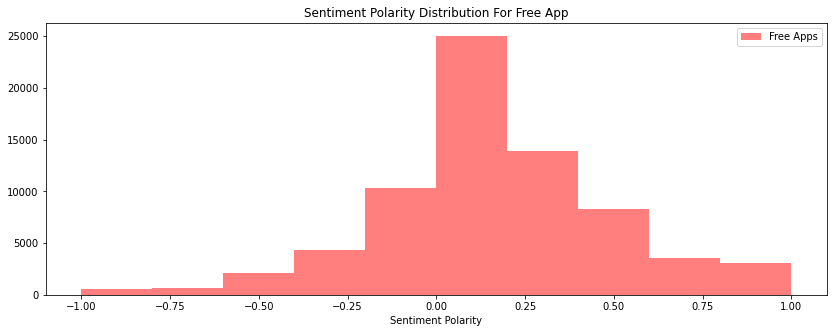

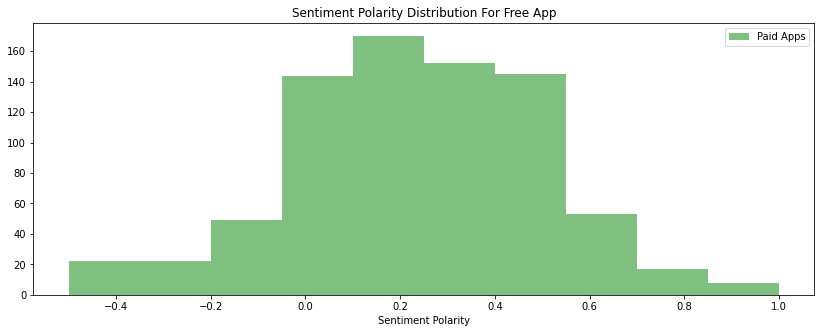

In [ ]:
plt.figure(figsize=(14,5))
plt.hist(free_apps["Sentiment_Polarity"], color="red",alpha=.5, label="Free Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()
print("\n")
plt.figure(figsize=(14,5))
plt.hist(paid_apps["Sentiment_Polarity"], color="green",alpha=.5, label="Paid Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

# **SUMMARY**
*  **Most reviews are for category of 'Family' and 'Game'.**
*  **Most installed apps are from 'GAME' and 'COMMUNICATION' Category.**
*  **Top installed games are 'Subway Surfers','Candy Crush Saga', 'Temple Run 2'and 'Pou'.**
*  **Free apps have more number of Ratings than the paid apps.**
*  **Paid apps have more positive user reviews than the free apps while free apps have more number of negative reviews than paid apps.**

*  **Positive sentiment percentage for paid apps is more than the free apps.**

**REFERENCE**


*   https://www.geeksforgeeks.org
*   https://www.stackoverflow.com
*   https://www.w3schools.com



